<a href="https://colab.research.google.com/github/jlopez1288/Predictive_Analytics101/blob/main/Advertising_Analysis_JennLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

Determine if a user cLicked on the ad based on the data.

#Task 2a: Install the Needed Libraries

In [2]:
#no new install needed at the moment

#Task 2b: Import the Needed Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
sns.set()
import plotly
import cufflinks as cf

#Task 3: Load the Data

In [4]:
ad_data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv')
left_aligned_ad_data = ad_data.style.set_properties(**{'text-align': 'left'})
display(left_aligned_ad_data)

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [12]:
[x.lower().replace("", "_") for x in ad_data.columns]

['_d_a_i_l_y_ _t_i_m_e_ _s_p_e_n_t_ _o_n_ _s_i_t_e_',
 '_a_g_e_',
 '_a_r_e_a_ _i_n_c_o_m_e_',
 '_d_a_i_l_y_ _i_n_t_e_r_n_e_t_ _u_s_a_g_e_',
 '_a_d_ _t_o_p_i_c_ _l_i_n_e_',
 '_c_i_t_y_',
 '_m_a_l_e_',
 '_c_o_u_n_t_r_y_',
 '_t_i_m_e_s_t_a_m_p_',
 '_c_l_i_c_k_e_d_ _o_n_ _a_d_']

In [13]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


##Get Data Info

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [8]:
ad_data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

##Find Missing Values

In [14]:
ad_data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [15]:
#data is clean, it does not have missing values

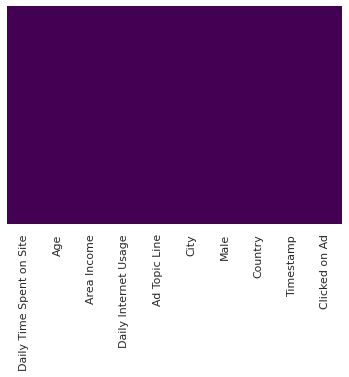

In [16]:
sns.heatmap(ad_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [17]:
#the heatmap visualizes clean data

#Task 5: Perform Data Cleaning

In [27]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


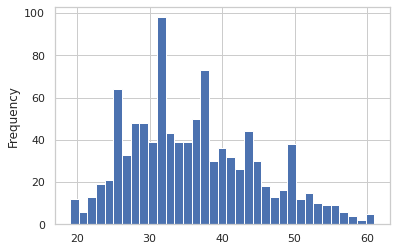

In [28]:
ad_data['Age'].plot(kind= "hist", bins= 35)

In [ ]:
#plot dist is kind of normal in shape

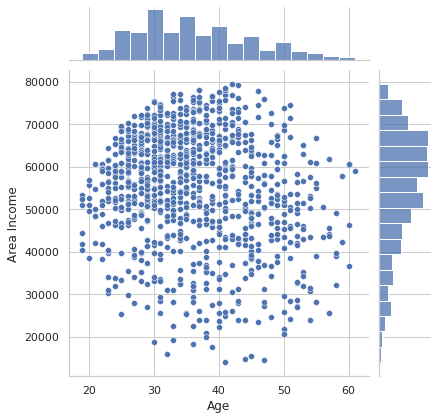

In [32]:
sns.jointplot(x="Age", y="Area Income", data= ad_data);

In [ ]:
#the joint plot some clustering but it does not look as clear

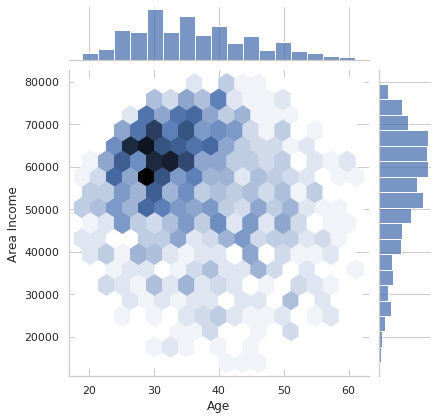

In [33]:
sns.jointplot(x="Age", y="Area Income", kind="hex", data= ad_data);

In [34]:
#the hex jointplot shows more observations between the Age of 30-40 yo., and with an Area income between 60k-70k

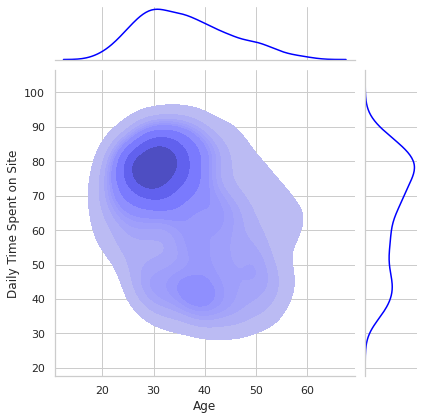

In [40]:
sns.jointplot(x="Age", y="Daily Time Spent on Site", data= ad_data, color="blue", shade= True, kind="kde");

In [ ]:
#There seem a concentration of 30yr-old people that Spends the most time between 70-80 min daily on site.

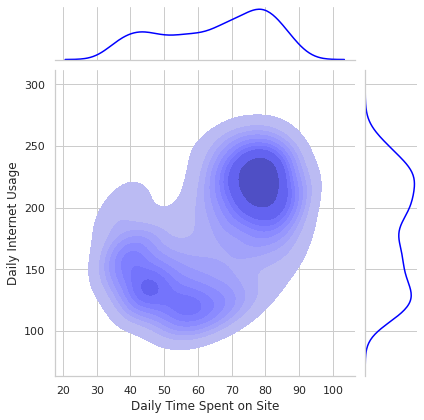

In [41]:
sns.jointplot(x="Daily Time Spent on Site", y="Daily Internet Usage", data= ad_data, color="blue", shade= True, kind="kde");

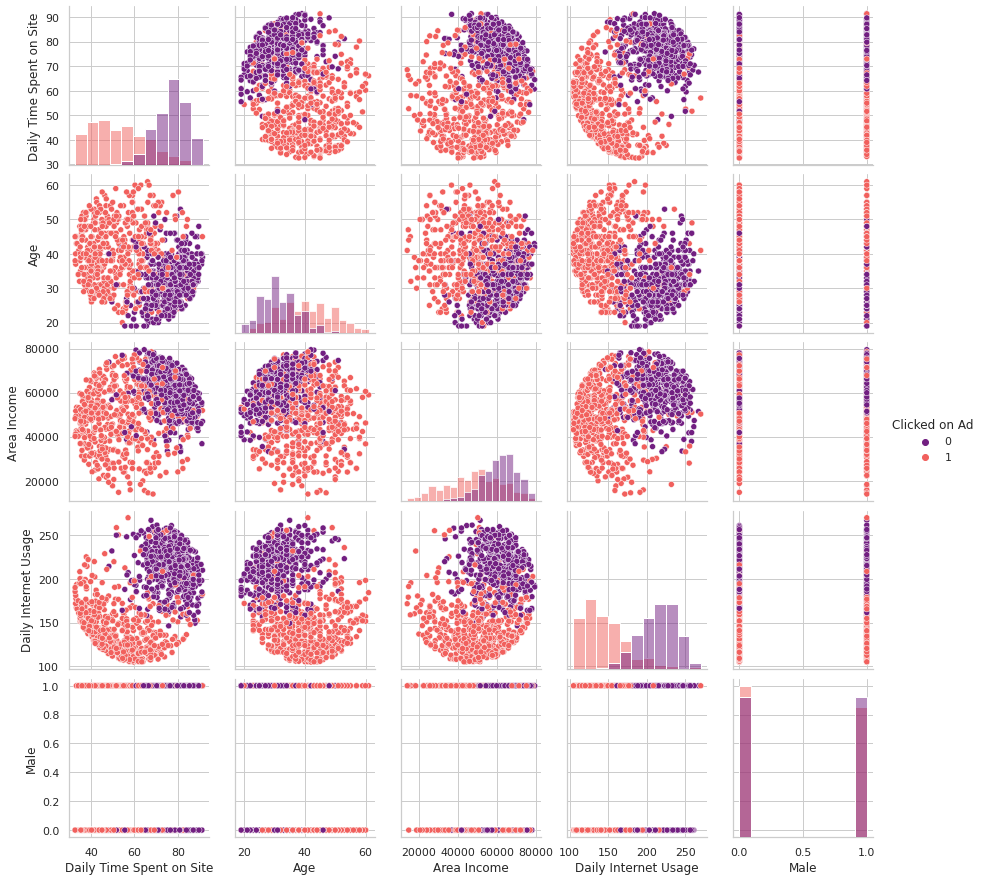

In [47]:
sns.pairplot(ad_data, hue="Clicked on Ad",palette="magma", diag_kind='hist');

In [ ]:
#there is almost an even split , almost no correlation between the two

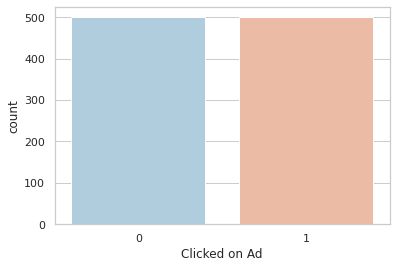

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',data= ad_data, palette='RdBu_r')

In [19]:
#zero is for user that did not click and 1 stands for the count that clicked

In [20]:
#Re-formatting Object to integer ofr Column name Timestamp

In [21]:
ad_data['Timestamp'] =  pd.to_datetime(ad_data['Timestamp'])

In [22]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [23]:
#Timestamp has been converted to integer format

#Task 6: Visualize Cleaned up Dataset

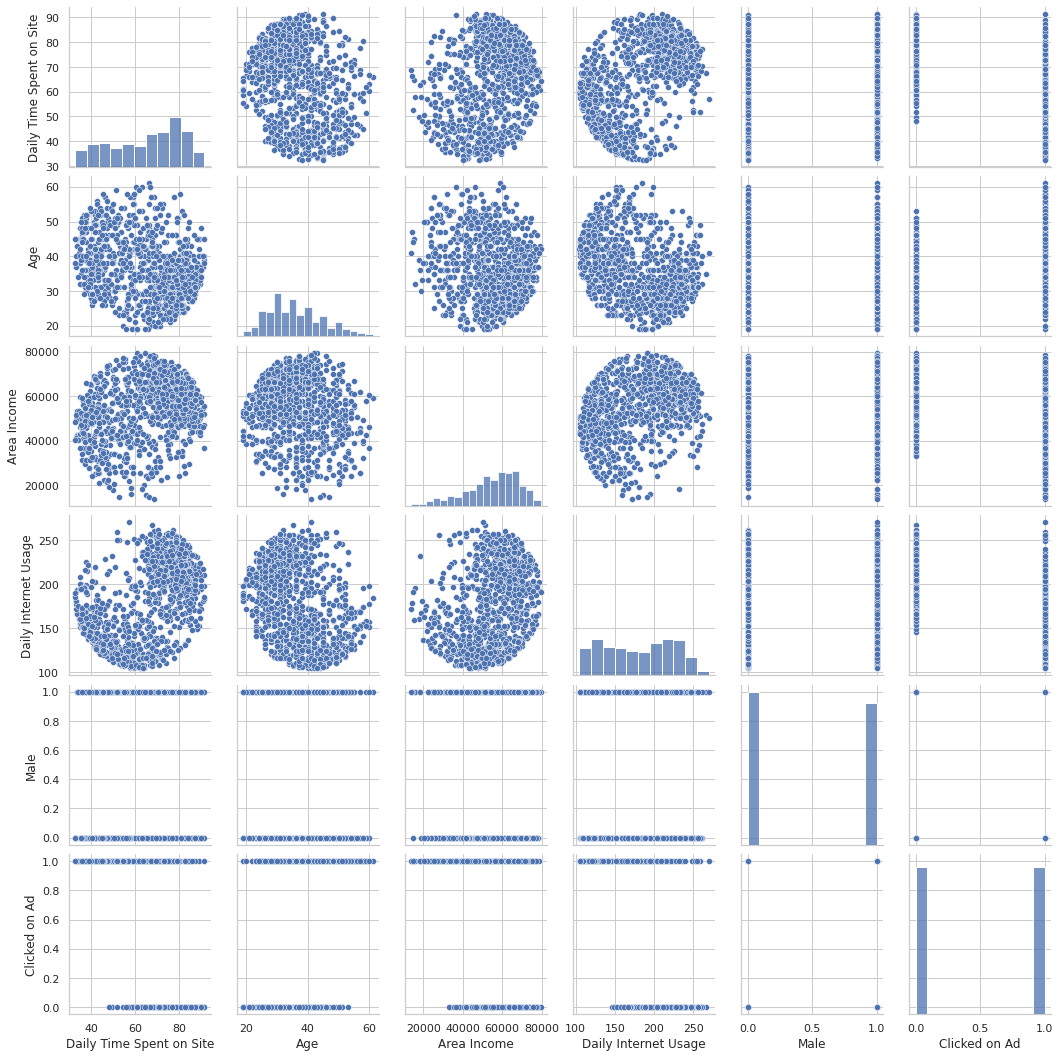

In [49]:
sns.pairplot(ad_data)

In [51]:
#Daily time spent site could determined the amount of clicks on ad

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [50]:
from sklearn.model_selection import train_test_split

In [56]:
X= ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage','Male']]

In [58]:
y= ad_data ['Clicked on Ad']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#Task 9: Choose the ML Method to follow

In [68]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

#Task 10: Train the ML Model

In [69]:
from sklearn.linear_model import LogisticRegression

In [73]:
logmodel= LogisticRegression()

In [74]:
logmodel.fit(X_train, y_train)

LogisticRegression()

#Task 11: Test the Model

In [79]:
predictions= logmodel.predict(X_test)

In [80]:
from sklearn import metrics

In [81]:
print (metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [83]:
#Findings= accuracy is fairly good since it is above 80%, 
# model might be overfitted